## Section 7_Optimizer (1) Momentum


NAG에서 미분 관련 문제가 계속 있었던 이유,

`tf.gradients(ys, xs)`에서 xs는 ys에 dependent(종속적)이여만 하는데,

independet한 미분인자로 미분을 계속 시도하여서 None타입 관련된 에러를 겪게 된다.

따라서, z를 미분인자에 관련된 수식으로 표현하면 해결된다.

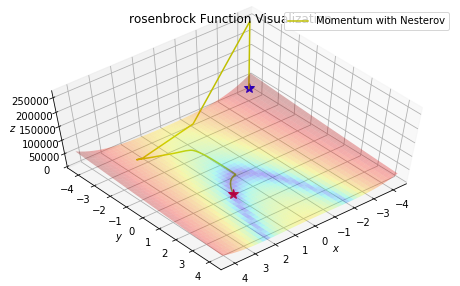

In [5]:
import numpy as np
import pandas as pd

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

# 우선 실행해 주세요
np.random.seed(30)
tf.random.set_random_seed(30)


def rosenbrock(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2


def generate_rosenbrock_plot():
    # rosenbroc function을 plotting 합니다.
    xmin, xmax, xstep = -4.5, 4.5, .2
    ymin, ymax, ystep = -4.5, 4.5, .2

    xs_ = np.arange(xmin, xmax, xstep)
    ys_ = np.arange(ymin, ymax, ystep)

    x, y = np.meshgrid(xs_, ys_)
    z = rosenbrock(x, y)

    plt.figure(figsize=(8, 5))
    ax = plt.axes(projection='3d', elev=50, azim=-50)

    # minimum point
    min_x, min_y = (1.0, 1.0)
    minima = np.array([min_x, min_y])
    minima_ = minima.reshape(-1, 1)
    z_minima = rosenbrock(*minima)
    ax.plot(*minima_, z_minima, 'r*', markersize=10)

    # init point
    min_x, min_y = (-4.0, -4.0)
    minima = np.array([min_x, min_y])
    minima_ = minima.reshape(-1, 1)
    z_minima = rosenbrock(*minima)
    ax.plot(*minima_, z_minima, 'b*', markersize=10)

    ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1,
                    edgecolor='None', alpha=0.3, cmap=plt.cm.jet)

    ax.view_init(60, 50)
    ax.set_title("rosenbrock Function Visualization")
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')

    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))

    return ax


def nag_momentum_graph(start_x, start_y, func, lr, momentum=0.9):
    graph = tf.Graph()
    with graph.as_default():
        x = tf.Variable(initial_value=tf.constant(start_x), dtype=tf.float32, name='x')
        y = tf.Variable(initial_value=tf.constant(start_y), dtype=tf.float32, name='y')

        m = momentum

        vx = tf.Variable(initial_value=tf.constant(0.))
        vy = tf.Variable(initial_value=tf.constant(0.))

        xm = x + m * vx
        ym = y + m * vy

        z = func(xm, ym)
        z = tf.identity(z, name='z')

        dloss_x = lr * tf.gradients(z, xm)[0]
        assign_vx = tf.assign_sub(vx, m * vx - lr * dloss_x)
        assign_x = tf.assign_sub(x, vx)

        dloss_y = lr * tf.gradients(z, ym)[0]
        assign_vy = tf.assign_sub(vy, m * vy - lr * dloss_y)
        assign_y = tf.assign_sub(y, vy)

        train_op = tf.add_to_collection(tf.GraphKeys.TRAIN_OP, tf.group(assign_vx, assign_vy, assign_x, assign_y))
    return graph

def trace(graph, max_iter):
    with tf.Session(graph=graph) as sess:
        sess.run(tf.global_variables_initializer())

        x = graph.get_tensor_by_name('x:0')
        y = graph.get_tensor_by_name('y:0')
        z = graph.get_tensor_by_name('z:0')
        train_op = tf.get_collection(tf.GraphKeys.TRAIN_OP)[0]

        xs, ys, zs = [], [], []
        for i in range(max_iter):
            x_, y_, z_ = sess.run([x, y, z])

            xs.append(x_)
            ys.append(y_)
            zs.append(z_)

            sess.run(train_op)
    return xs, ys, zs

start_x, start_y = -4., -4.

# Momentum with nesterov
learning_rate = 0.01
max_iter = 30000
nag_graph = nag_momentum_graph(start_x,start_y, rosenbrock, learning_rate)
nag_xs, nag_ys, nag_zs = trace(nag_graph, max_iter)

ax = generate_rosenbrock_plot()
ax.plot(nag_xs, nag_ys, nag_zs, label='Momentum with Nesterov', color='y')
ax.legend()
plt.show()


In [0]:
%matplotlib inline
import numpy as np
import pandas as pd

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

## 문제 1. Rosenbrock 학습시키기

Gradient Descent, Momentum, Momentum Nesterov 을 이용해 rosenbrock 함수의 최소점을 찾아봅니다.

fix me 주석을 지우고 알맞은 코드를 넣어주세요

**Rosenbrock Function**
${\displaystyle f(x,y)=(1-x)^{2}+100(y-x^{2})^{2}},$

![Imgur](https://i.imgur.com/lAuApse.png)

In [0]:
# 우선 실행해 주세요
np.random.seed(30)
tf.random.set_random_seed(30)

def rosenbrock (x, y):    
    return (1-x) ** 2 + 100*(y - x**2) ** 2

def generate_rosenbrock_plot():
    # rosenbroc function을 plotting 합니다.
    xmin, xmax, xstep = -4.5, 4.5, .2
    ymin, ymax, ystep = -4.5, 4.5, .2

    xs_ = np.arange(xmin, xmax, xstep)
    ys_ = np.arange(ymin, ymax, ystep)

    x, y = np.meshgrid(xs_, ys_)
    z = rosenbrock(x,y)
    
    plt.figure(figsize=(8, 5))
    ax = plt.axes(projection='3d', elev=50, azim=-50)
    
    # minimum point 
    min_x, min_y = (1.0, 1.0)
    minima = np.array([min_x, min_y])
    minima_ = minima.reshape(-1, 1)
    z_minima = rosenbrock(*minima)
    ax.plot(*minima_, z_minima, 'r*', markersize=10)

    # init point 
    min_x, min_y = (-4.0, -4.0)
    minima = np.array([min_x, min_y])
    minima_ = minima.reshape(-1, 1)
    z_minima = rosenbrock(*minima)
    ax.plot(*minima_, z_minima, 'b*', markersize=10)
    
    ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1,
                    edgecolor='None', alpha=0.3, cmap=plt.cm.jet)

    ax.view_init(60, 50)
    ax.set_title("rosenbrock Function Visualization")
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')

    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))

    return ax

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* `#FixMe` 부분을 고쳐주세요

In [3]:
# def gradient_descent_graph(start_x, start_y, func, lr):
#     graph = tf.Graph()
#     with graph.as_default():
#         x = tf.Variable(initial_value=tf.constant(start_x), name='x')
#         y = tf.Variable(initial_value=tf.constant(start_y), name='y')

#         # Get Gradient x,y with tf_f
#         z = func(x, y)
#         z = tf.identity(z, name='z')
#         train_op = #fix me#
#     return graph

SyntaxError: ignored

In [0]:
# def momentum_graph(start_x, start_y, func, lr, momentum=0.9):
#     graph = tf.Graph()
#     with graph.as_default():
#         x = tf.Variable(initial_value=tf.constant(start_x), name='x')
#         y = tf.Variable(initial_value=tf.constant(start_y), name='y')

#         z = func(x, y)
#         z = tf.identity(z, name='z')
#         train_op = #fix me#
#     return graph

In [0]:
def nag_momentum_graph(start_x, start_y, func, lr, momentum=0.9):
    graph = tf.Graph()
    with graph.as_default():
        x = tf.Variable(initial_value=tf.constant(start_x), dtype=tf.float32, name='x')
        y = tf.Variable(initial_value=tf.constant(start_y), dtype=tf.float32, name='y')
        
        z = func(x, y)
        z = tf.identity(z, name='z')
        
        m = momentum
        
        vx = tf.Variable(initial_value=tf.constant(0.))
        assign_vx = tf.assign_sub(vx, m * vx - lr * tf.gradients(z, x + m * vx)[0])
        assign_x = tf.assign_add(x, vx)
        
        vy = tf.Variable(initial_value=tf.constant(0.))
        assign_vy = tf.assign_sub(v, m * vy - lr * tf.gradients(z, x + m * vy)[0])
        assign_y = tf.assign_add(x, vy)
        
        train_op = tf.add_to_collection(tf.GraphKeys.TRAIN_OP, tf.group(assign_vx, assign_vy))
    return graph

In [0]:
def trace(graph, max_iter):
    with tf.Session(graph=graph) as sess:
        sess.run(tf.global_variables_initializer())

        x = graph.get_tensor_by_name('x:0')
        y = graph.get_tensor_by_name('y:0')
        z = graph.get_tensor_by_name('z:0')
        train_op = tf.get_collection(tf.GraphKeys.TRAIN_OP)[0]

        xs, ys, zs = [], [], []
        for i in range(max_iter):
            x_, y_, z_ = sess.run([x, y, z])

            xs.append(x_)
            ys.append(y_)
            zs.append(z_)

            sess.run(train_op)
    return xs, ys, zs

In [23]:
start_x, start_y = -4., -4.

# # Gradient Descent 
# learning_rate = #fix me#
# max_iter = #fix me#
# gd_graph = gradient_descent_graph(start_x,start_y, rosenbrock, learning_rate)
# gd_xs, gd_ys, gd_zs = trace(gd_graph, max_iter)

# # Momentum 
# learning_rate = #fix me#
# max_iter = #fix me#
# mm_graph = momentum_graph(start_x,start_y, rosenbrock, learning_rate)
# mm_xs, mm_ys, mm_zs = trace(mm_graph, max_iter)

# Momentum with nesterov
learning_rate = 0.001
max_iter = 1000
nag_graph = nag_momentum_graph(start_x,start_y, rosenbrock, learning_rate)
nag_xs, nag_ys, nag_zs = trace(nag_graph, max_iter)

ax = generate_rosenbrock_plot()
# ax.plot(gd_xs, gd_ys, gd_zs, label='Gradient Descent', color='b')
# ax.plot(mm_xs, mm_ys, mm_zs, label='Momentum', color='g')
ax.plot(nag_xs, nag_ys, nag_zs, label='Momentum with Nesterov', color='y')
ax.legend()
plt.show()

TypeError: ignored

#### 정답 확인
* 아래 그램과 깉이 파란별에서 시작해 빨간별로 모두다 이동하면 성공입니다.<br>
![Imgur](https://i.imgur.com/dmxPuf2.png)

#  

<hr>
<div style = "background-image: url('https://algorithmai.io/static/media/logo.665798c4.png');background-repeat: no-repeat; background-position: right; background-size: 220px 40px; padding : 5px 10px 5px 5px;">
    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/04/17
</div>
<hr>